In [1]:
import os
import gzip
import math
import pickle
import cloudpickle
from math import log
from scipy import signal
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0,'font.size': 14,'axes.titlesize': 14,'axes.labelsize': 14,
                 'axes.grid':True,'xtick.direction': 'in','ytick.direction': 'in','ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 10,'xtick.major.size': 10,'legend.fancybox': True,
                 'legend.markerscale': 0.8,'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [3]:
import numpy as np
dirname = '/home/furkan/work/flicanalyzer/pypuca/dune/pods/'
hists={}
allArrays = np.array([])
for filename in sorted(os.listdir(dirname)):
    if 'run010928_0001_dl1_.pkl.gz' in filename:
            with gzip.open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
                
                for k in mydata.keys():

                    if k in hists: 
                         hists.update({k: np.concatenate((hists[k], mydata[k]))  })
                    else: hists[k] = mydata[k]

In [27]:
x = np.arange(len(hists['channel_143']))
# lowpass filter
b, a = signal.butter(3, 0.05)

data = signal.filtfilt(b, a, hists['channel_143'])

In [28]:
data.shape

(1000, 2000)

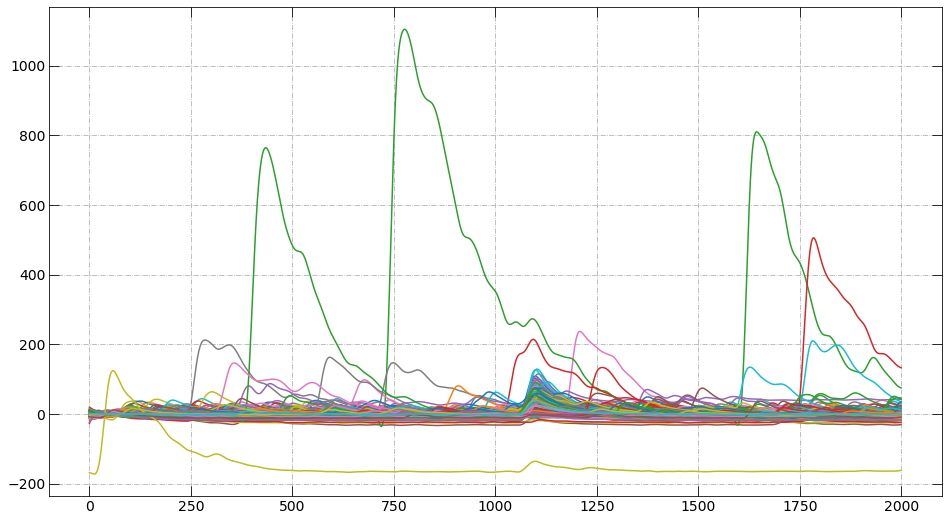

In [29]:

baseline = data[0:data.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = data-blines
clean.shape
for row in clean:
    #plt.ylim(-10000,10000)

    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)

del blines
del baseline
del row

In [45]:
from scipy import stats

linreg_array = np.array([])
print(data.shape)
for row in clean:
    y = row[0:1050]
    x = np.arange(len(y))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)    
    mask=[trend < 0.01 ]
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array = linreg_array > 0
#print(len(mask2))
eventSel=data[linreg_array]
print(eventSel.shape)


linreg_array = np.array([])
for row in eventSel:
    y = row[0:700]
    x = np.arange(len(y))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)    
    mask=[trend < 0.01 ]
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array = linreg_array > 0
#print(len(mask2))
eventSel1=eventSel[linreg_array]
print(eventSel1.shape)



(1000, 2000)
(965, 2000)
(885, 2000)


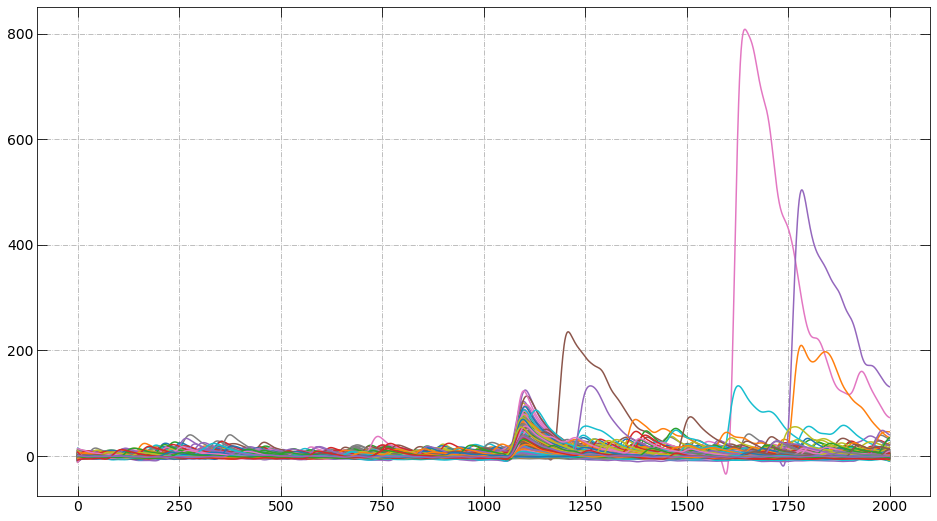

In [46]:
baseline = eventSel1[0:eventSel1.size, 0:1100].mean(axis=1)
blines = baseline.reshape(baseline.size, 1)
clean1 = eventSel1-blines
clean1.shape
for row in clean1:
    #plt.xlim(0, 1500)
    #plt.ylim(-10, 100)

    plt.plot(row)

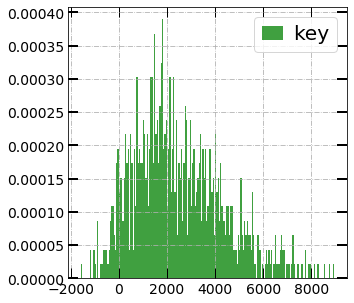

In [47]:
import scipy.integrate as integrate
import seaborn as sns
from scipy.signal import find_peaks

rcParams['figure.figsize'] = 5, 5
rcParams["legend.markerscale"] = 1
rcParams["legend.handlelength"] = 1.0
rcParams["legend.handletextpad"] = 0.5
import os



integArr = np.array([])
for row in clean1:

    indata= row[1060:1500,]
    result_simps = integrate.simps(indata)
    #print(result_simps)
    if result_simps > -2000 and result_simps < 9000:
        integArr = np.append(integArr, result_simps)
    #print(integArr.shape)
    #plt.plot(integArr)
from scipy.stats import norm

plt.hist(integArr, bins=200, density=True, facecolor='g', alpha=0.75, label='key')

#sns.distplot(integArr, kde=True)
#sns.distplot(integArr,fit=stats.maxwell)

#plt.yscale('log')
plt.grid(True)
#plt.xlim(-5000, 15000)

plt.legend(labelspacing=1, fontsize='x-large')  # To draw legend
plt.tick_params(axis='both',which='minor', direction="in",length=5,width=1)
plt.tick_params(axis='y',which='major', direction="in",length=10,width=2)
plt.tick_params(axis='x',which='major', direction="in",length=10,width=1)

plt.show()
    

In [ ]:
from matplotlib import rc
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

rcParams['figure.figsize'] = 10, 5

for key in select_dict: 
    integArr = np.array([])
    for row in select_dict[key]:
        
        indata= row[1060:1350,]
        result_simps = integrate.simps(indata)
        #print(result_simps)
        integArr = np.append(integArr, result_simps)
        #print(integArr.shape)
        #plt.plot(integArr)
    
    sample=integArr
    f = np.ravel(sample).astype(np.float)
    f=f.reshape(-1,1)
    g = mixture.GaussianMixture(n_components=4,covariance_type="full",)
    g.fit(f)
    g1 = mixture.GaussianMixture(n_components=8,covariance_type="full",)
    g1.fit(f)
    g2 = mixture.GaussianMixture(n_components=20,covariance_type="full",)
    g2.fit(f)
    weights = g.weights_
    means = g.means_
    covars = g.covariances_
    #print('w',weights, 'm', means, 'cov', covars)
    
    weights1 = g1.weights_
    means1 = g1.means_
    covars1 = g1.covariances_
    
    weights2 = g2.weights_
    means2 = g2.means_
    covars2 = g2.covariances_
    
    plt.hist(f, bins=150, histtype='step', density=True, ec='g', alpha=0.5)
    
    f_axis = f.copy().ravel()
    f_axis.sort()
    plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
    plt.plot(f_axis,weights1[0]*stats.norm.pdf(f_axis,means1[0],np.sqrt(covars1[0])).ravel(), c='blue')
    plt.plot(f_axis,weights2[0]*stats.norm.pdf(f_axis,means2[0],np.sqrt(covars2[0])).ravel(), c='black')
   
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.grid()
    plt.show()

In [ ]:
import scipy.integrate as integrate
import seaborn as sns
from scipy.signal import find_peaks

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
import os
from scipy.stats import norm



for key in select_dict: 
    integArr = np.array([])
    for row in select_dict[key]:
        
        indata= row[1060:1350,]
        result_simps = integrate.simps(indata)
        #print(result_simps)
        integArr = np.append(integArr, result_simps)
    print(integArr.shape)
    # reshape
        #plt.plot(integArr)




In [ ]:
import scipy.integrate as integrate
import seaborn as sns
from scipy.signal import find_peaks

rcParams['figure.figsize'] = 20, 10
rcParams["legend.markerscale"] = 1
rcParams["legend.handlelength"] = 1.0
rcParams["legend.handletextpad"] = 0.5


for key in select_dict: 
    integArr = np.array([])
    for row in select_dict[key]:
        
        indata= row[1060:1350,]
        result_simps = integrate.simps(indata)
        #print(result_simps)
        integArr = np.append(integArr, result_simps)
        #print(integArr.shape)
        #plt.plot(integArr)
    peaks, properties = find_peaks(integArr, prominence=1, width=10)
    print(properties["prominences"]) 
    print(properties["widths"])
    
    plt.hist(integArr, bins=300, density=True, facecolor='g', alpha=0.75, label=key)
    #plt.plot(integArr)
    #plt.plot(peaks, integArr[peaks], "x")
    plt.vlines(x=peaks, ymin=integArr[peaks] - properties["prominences"], ymax = integArr[peaks], color = "C1")
    #sns.distplot(integArr)
    #sns.distplot(integArr,fit=stats.maxwell)

    #plt.yscale('log')
    plt.grid(True)
    plt.legend(labelspacing=1, fontsize='xx-large')  # To draw legend
    plt.tick_params(axis='both',which='minor', direction="in",length=5,width=1)
    plt.tick_params(axis='y',which='major', direction="in",length=10,width=2)
    plt.tick_params(axis='x',which='major', direction="in",length=10,width=1)

    plt.show()
    

In [ ]:
asdads = savgol_filter(arr, 5, 2, mode='nearest')
asdads

In [ ]:
baseline = eventSel[0:eventSel.size, 800:1050].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = eventSel-blines
clean.shape

In [ ]:
for row in clean:
    #print(row)
    plt.plot(row)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
data = clean.mean(axis=0)
plt.plot(data)
plt.grid(True)
#t = np.arange(len(data))
plt.xlim(900, 1600)
#plt.ylim(-5, 200)
plt.show()

In [ ]:
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda data: special.jv(2.5,data), 1000, 1400)
result

In [ ]:
import scipy.integrate as integrate

integArr = np.array([])
print(integArr)

for row in clean:

    indata= row[1060:1350,]
    result_simps = integrate.simps(indata)
    #print(result_simps)
    integArr = np.append(integArr, result_simps)

print(integArr.shape)
#plt.plot(integArr)
n, bins, patches = plt.hist(integArr, 200, density=True, facecolor='g', alpha=0.75)

plt.grid(True)
plt.show()

In [ ]:
from scipy import stats
import numpy as np


dataAll=mydata['channel_135']
y=dataAll[ 0:dataAll.size ,0:1100]
x = np.arange(len(y))
print(y(axis=1))
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("slope:", slope)
print("p_value:", p_value)
print('std_err:',std_err)
#mask=[p_value >0.01 ]
#dataAll[mask,:]

#a

#baseline = arr[0:arr.size, 1:100].mean(axis=1)

In [ ]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
#x = electrocardiogram()[2000:4000]
x=mydata['channel_135'][39]
test=x[ 0:900]
#print(x)
print('_______')
#print(test)
peaks, _ = find_peaks(test, height=1580)
print(test[peaks].size)
plt.plot(x)
plt.plot(peaks, test[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()


In [ ]:
from scipy import stats
import numpy as np


test=mydata['channel_135'][29]
y=test[ 0:1100]
x = np.arange(len(y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("slope:", slope)
print("p_value:", p_value)
print('std_err:',std_err)
mask=[p_value >0.01 ]
print(mask)


baseline = arr[0:arr.size, 1:100].mean(axis=1)


In [ ]:
from scipy import stats
import numpy as np


test=mydata['channel_135'][39]
y=test[ 0:1100]
x = np.arange(len(y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("slope:", slope)
print("p_value:", p_value)
print('std_err:',std_err)
p_value
print(mask)

In [ ]:
from scipy import stats
import numpy as np


test=mydata['channel_135'][39]
y=test[ 0:1100]
x = np.arange(len(y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("slope:", slope)
print("p_value:", p_value)
print('std_err:',std_err)
mask=[p_value >0.01 ]

#y=None

In [ ]:
from scipy import stats
import numpy as np


test=mydata['channel_135'][3]
y=test[ 0:1100]
x = np.arange(len(y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("slope:", slope)
print("p_value:", p_value)
print('std_err:',std_err)
mask=[p_value >0.01 ]
print(mask)
mask1=np.array([True, True, False,])
print(mask1)
a[mask1,:]


baseline = arr[0:arr.size, 1:100].mean(axis=1)
print(arr.size)
Nevent = (baseline.size)
print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = arr-blines
clean.shape

In [ ]:
# https://en.wikipedia.org/wiki/QRS_complex
peaks, _ = find_peaks(x, distance=1)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [ ]:
peaks, properties = find_peaks(x, prominence=(None, 1))
                                 #prominences = peak_prominences(x, peaks)[0]
properties["prominences"].max()
#0.5049999999999999
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()


In [ ]:
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt



peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]
prominences
#array([1.24159486, 0.47840168, 0.28470524, 3.10716793, 0.284603  ,
       0.47822491, 2.48340261, 0.47822491])

plt.show()



In [ ]:
>>> plt.plot(x)
>>> plt.plot(peaks, x[peaks], "x")
>>> plt.show()

In [ ]:
rcParams['figure.figsize'] = 20, 10

for x in range(10):
    plt.plot(mydata['channel_135'][x], label=x, linewidth=4)
    plt.title('channel_135')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

    plt.legend(labelspacing=1, fontsize='x-large')  # To draw legend
    plt.tick_params(axis='both',which='minor', direction="in",length=5,width=1)
    plt.tick_params(axis='y',which='major', direction="in",length=10,width=2)
    plt.tick_params(axis='x',which='major', direction="in",length=10,width=1)
plt.show()


In [ ]:
%matplotlib inline
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(np.zeros_like(data),"-",color="gray")
plt.show()

In [ ]:
a = np.array([[1,20,30,40],
              [5,60,70,80],
              [2,10,11,12]])
a.shape

In [ ]:
 a[a[:,0] > 3]
baseline = arr[0:arr.size, 1:100].mean(axis=1)

In [ ]:
mask=np.array([True, True, False,])
print(mask)
a[mask,:] 